# 

# <center> MACHINE LEARNING - REGRESSORS

## Imports

In [49]:
# Imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [50]:
# Load data
url = "https://raw.githubusercontent.com/FernandoSartorGH/data/main/housing.csv"

df = pd.read_csv(url)

In [51]:
df

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [52]:
# Define X and y
X, y = df.drop(columns='target'), df.target

## EDA - Exploratory Data Analisys

In [53]:
# Check na/nul values
df.isna().sum()

ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [54]:
# Check types
df.dtypes

ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [55]:
# Unique values
df.nunique()

ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
target     229
dtype: int64

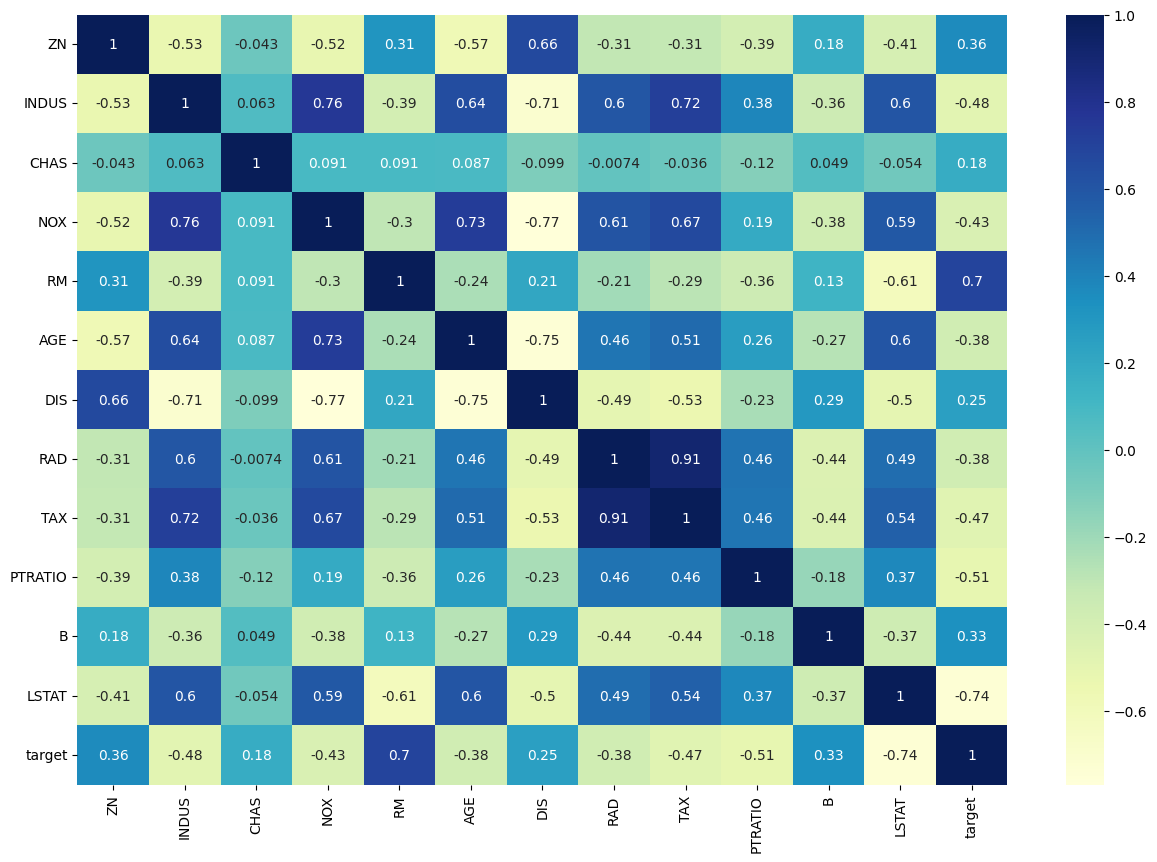

In [56]:
# Correlation
ax = sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
ax.figure.set_size_inches(15,10)
plt.show()

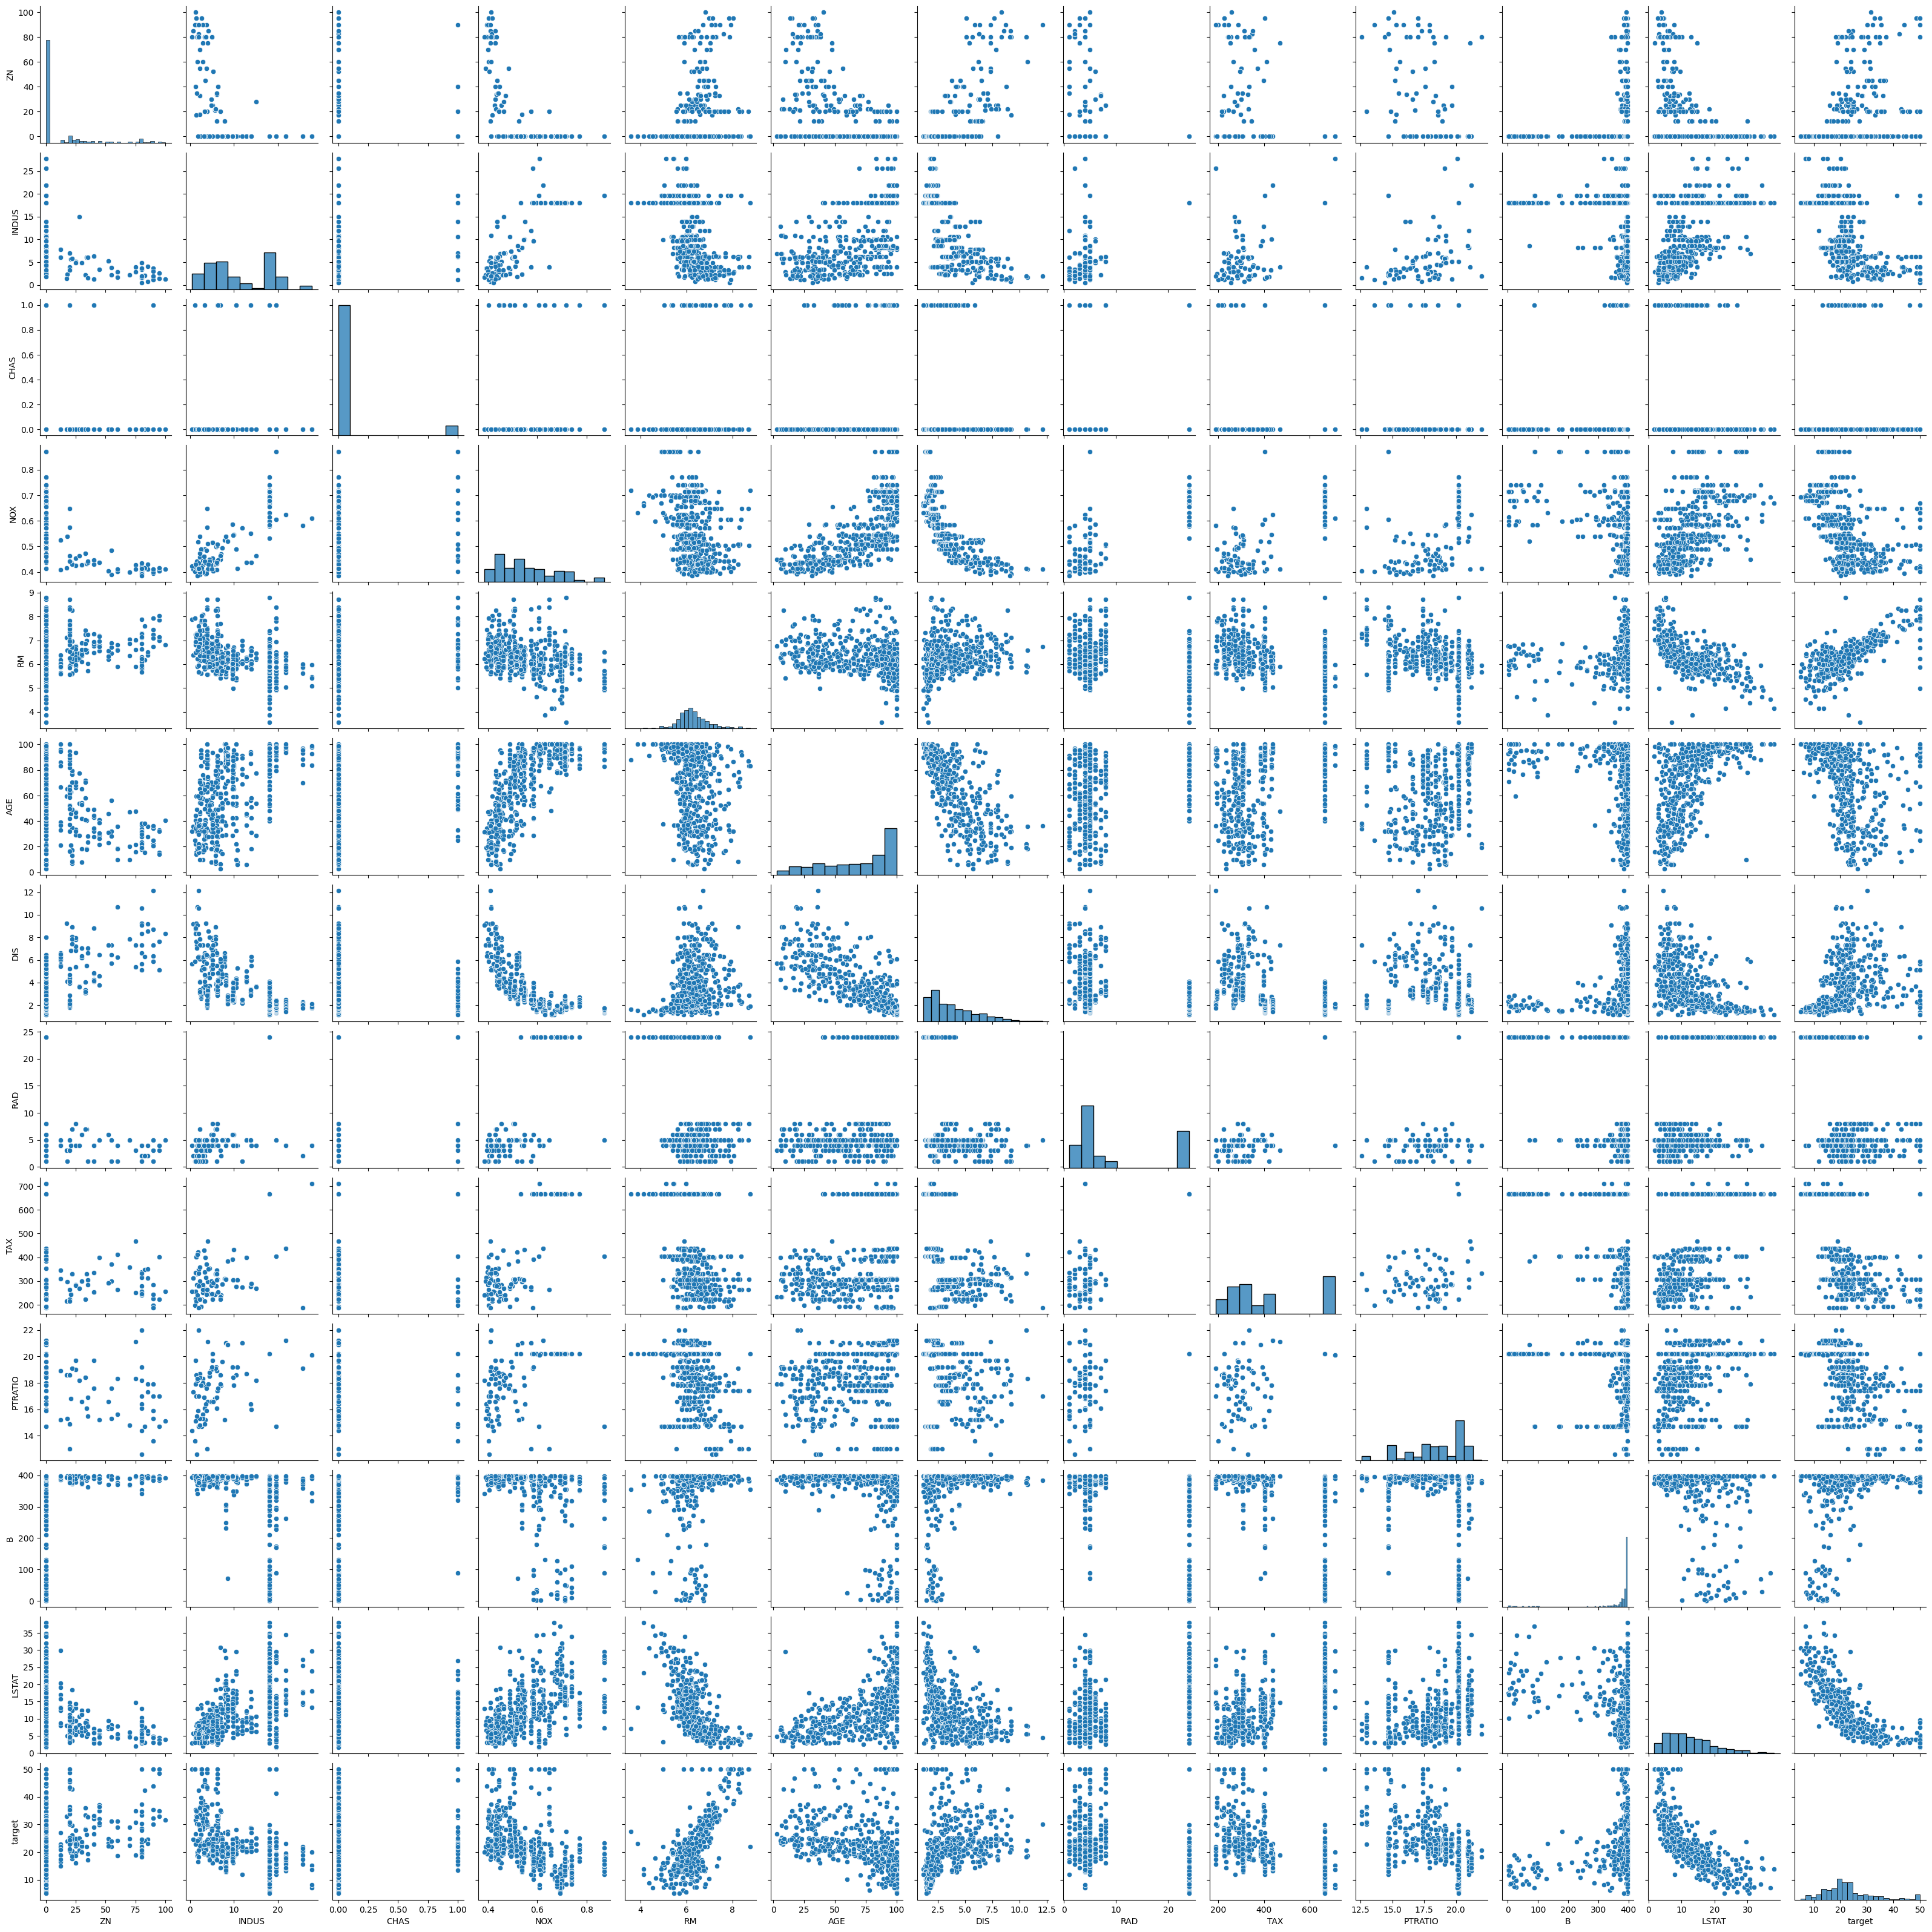

In [57]:
# Visual correlation and distribuitions
sns.pairplot(df)
plt.show()

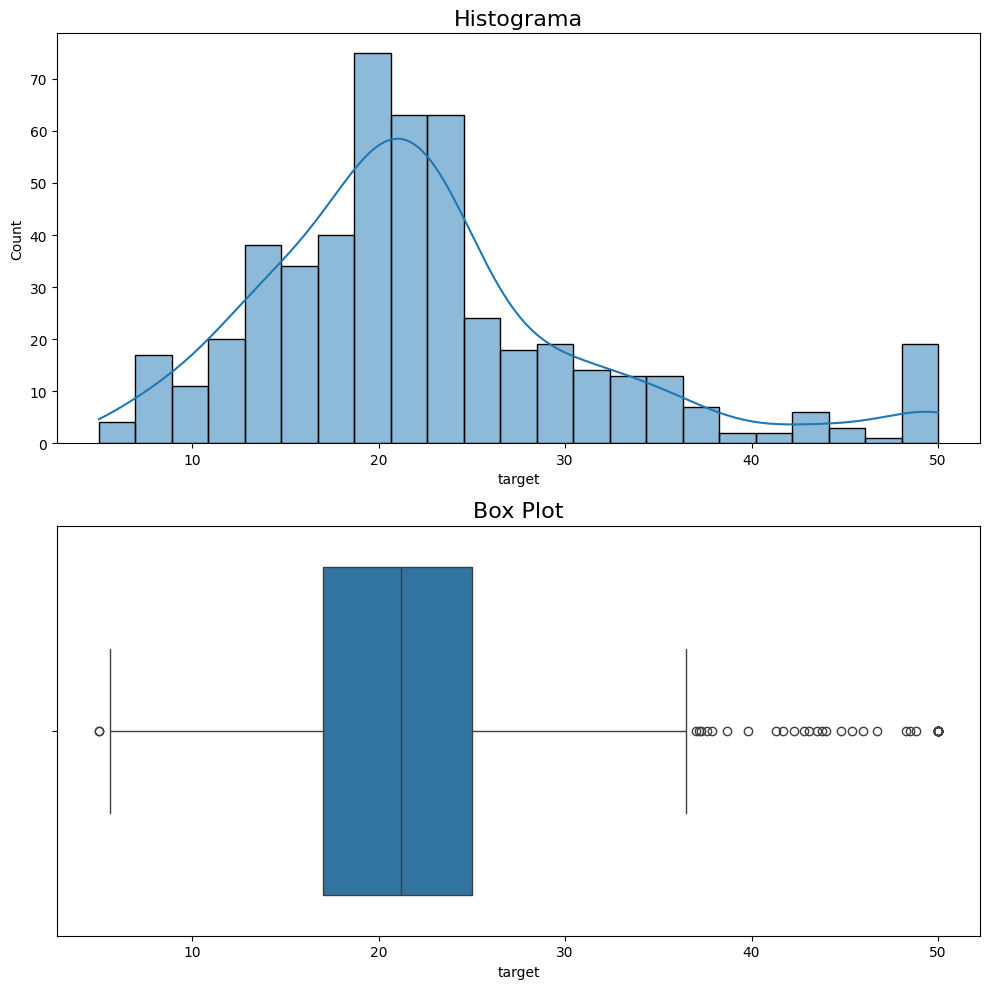

In [58]:
# Target Distribuition

# Tamanho da figura
plt.figure(figsize=(10, 10))

# Histograma
plt.subplot(2, 1, 1)
sns.histplot(df, x="target",multiple="stack", kde=True)
plt.title("Histograma", fontsize=16)

# Box plot
plt.subplot(2, 1, 2)
sns.boxplot(x=df.target, orient="h")
plt.title("Box Plot", fontsize=16)

# Evitar sobreposição
plt.tight_layout()

# Exibir
plt.show()

In [59]:
# X distribuitions

---

# Features Engeneering

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [61]:
# Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale data
scaler = MinMaxScaler().fit(X_train)

# Log data
y_train_log, y_test_log = np.log(y_train), np.log(y_test)

---

# Fit Function

In [62]:
def fit_models(X_train, X_test, y_train, y_test, models, scaled_required):

    r2 = []
    mse = []
    names = []

    # Scale data
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # fit models
    for name, model in models:
        model.fit(X_train, y_train) if name not in scaled_required else model.fit(X_train_scaled, y_train)
        result = model.score(X_test, y_test) if name not in scaled_required else model.score(X_test_scaled, y_test)

        y_pred = model.predict(X_test) if name not in scaled_required else model.predict(X_test_scaled)
        m_s_e = mean_squared_error(y_test, y_pred)

        r2.append(result)
        mse.append(m_s_e)
        names.append(name)

    # Resume base line
    result_dict = {
        "model": names,
        "r2": r2,
        "mse": mse
    }

    resume_models = pd.DataFrame(result_dict).sort_values(by="r2", ascending=False)

    return resume_models

---



# Base Line Models

In [63]:
# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import r2_score, mean_squared_error

In [64]:
# Models List
base_line_models = []
base_line_models.append(('LinReg', LinearRegression()))
base_line_models.append(('KNN', KNeighborsRegressor()))
base_line_models.append(('DT', DecisionTreeRegressor()))

# Scale data required
scaled_required = ['KNN']

In [65]:
# fit
fit_models(X_train, X_test, y_train, y_test, base_line_models, scaled_required)

,model,r2,mse
2,DT,0.773030,23.298235
0,LinReg,0.756779,24.966402
1,KNN,0.722502,28.484831


---

# Fit Models

In [66]:
# Models
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
# Models List
models = []
models.append(('SVM', SVR()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtreTrees', ExtraTreesRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('GradientBoost', GradientBoostingRegressor()))

# Scale data required
models_scaled_required = ['SVM']

In [68]:
fit_models(X_train, X_test, y_train, y_test, models, scaled_required)

,model,r2,mse
2,ExtreTrees,0.916472,8.574029
4,GradientBoost,0.914846,8.740967
1,RandomForest,0.914562,8.770089
3,AdaBoost,0.856844,14.694837
0,SVM,0.186551,83.499624


---

# Data Log Modeling

In [69]:
# base line models LinLog
fit_models(X_train, X_test, y_train_log, y_test_log, base_line_models, scaled_required)

,model,r2,mse
2,DT,0.794677,0.045106
1,KNN,0.754707,0.053886
0,LinReg,0.733687,0.058504


In [70]:
# models LinLog
fit_models(X_train, X_test, y_train_log, y_test_log, models, models_scaled_required)

,model,r2,mse
2,ExtreTrees,0.884904,0.025285
1,RandomForest,0.871476,0.028234
4,GradientBoost,0.870120,0.028532
3,AdaBoost,0.827933,0.037800
0,SVM,0.821687,0.039172


---

# Tuning Hyperparameters

Updating tuning strategies

In [71]:
# Imports
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [72]:
# Random forest hyperparameter
RF_Params = [
    {'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
]

In [73]:
# Random forest hyperparameter
ET_Params = [
    {'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
]

## Best Default Model

In [74]:
# Define the model
best_default = ExtraTreesRegressor(n_estimators = 100, random_state = 123)

# Fit the model
best_default.fit(X_train, y_train)

# Predictions
y_pred = best_default.predict(X_test)

# Accuracy
best_r2 = r2_score(y_test, y_pred)
print(f'r2: {round(best_r2*100, 2)}%')

r2: 92.16%


## Random Search Parameter Tuning

### Top 1 Model - Random Forest

In [75]:
# model
model = RandomForestRegressor()

# Hyperparameters
param_grid = RF_Params
rcv = RandomizedSearchCV(model, RF_Params, n_iter = 10, cv = 10, scoring = 'r2', n_jobs=-1)

# fit
rcv.fit(X_train, y_train)

# Results
best_parameters = rcv.best_params_

In [76]:
# Best score
print(best_parameters)
print(f"best_r2: {rcv.best_score_.round(4)}")

{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
best_r2: 0.8577


#### Top 2 Model - Extra Trees

In [77]:
# model
model = ExtraTreesRegressor()

# Hyperparameters
param_grid = ET_Params
rcv = RandomizedSearchCV(model, ET_Params, n_iter = 10, cv = 10, scoring = 'r2', n_jobs=-1)

# fit
rcv.fit(X_train, y_train)

# Results
best_parameters = rcv.best_params_

In [78]:
# Best score
print(f"best_r2: {rcv.best_score_.round(4)}")
best_parameters

{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
best_r2: 0.8348


## Grid Search Parameter Tuning

In [79]:
# Create the parameter grid based on the results of random search
rf_param_grid = {
    'bootstrap': [False],
    'max_depth': [80,100,120],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [1400, 1600, 1800]
}

In [80]:
# model
model = RandomForestRegressor()

# Hyperparameters
gscv = GridSearchCV(model, rf_param_grid, cv = 10, scoring = 'r2', n_jobs=-1)

# fit
gscv.fit(X_train, y_train)

# Results
best_parameters = gscv.best_params_

In [81]:
# Best score
print(f"best_r2: {gscv.best_score_.round(4)}")
best_parameters

{'bootstrap': False, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 1400}
best_r2: 0.8589


---

# Save Model

In [82]:
import pickle

file = 'best_regressor.sav'
pickle.dump(best_default, open(file, 'wb'))
print("Model saved successfully!")

Model saved successfully!


---

# Reload Model

In [83]:
# Load model
file = 'best_regressor.sav'
final_model = pickle.load(open(file, 'rb'))
print("Model loaded successfully!")

Model loaded successfully!


In [84]:
# Make Predictions
y_pred = final_model.predict(X_test).round(1)

In [85]:
# View Predictions
dict_df = {
    "y_test": y_test,
    "y_pred": y_pred
}

pd.DataFrame(dict_df)

,y_test,y_pred
64,33.0,31.7
100,27.5,24.2
400,5.6,9.5
485,21.2,22.0
454,14.9,13.4
...,...,...
350,22.9,23.8
191,30.5,30.5
239,23.3,24.8
109,19.4,19.3


---